# Clustering Jerarquico

In [18]:
# imports
from matplotlib import pyplot as plt
import numpy as np

In [19]:
# setups
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)  # suprime notación científica en los tipos de dato float

### Generación de los datos de ejemplo

In [20]:
from sklearn.datasets import make_blobs

In [21]:
# make_blobs retorna una tupla (puntos, centroide al que pertenece)
X, y = make_blobs(n_samples=200, n_features=2, centers=2, cluster_std=1.8, random_state=101)

Text(0.5, 1.0, 'Datos de Ejemplo')

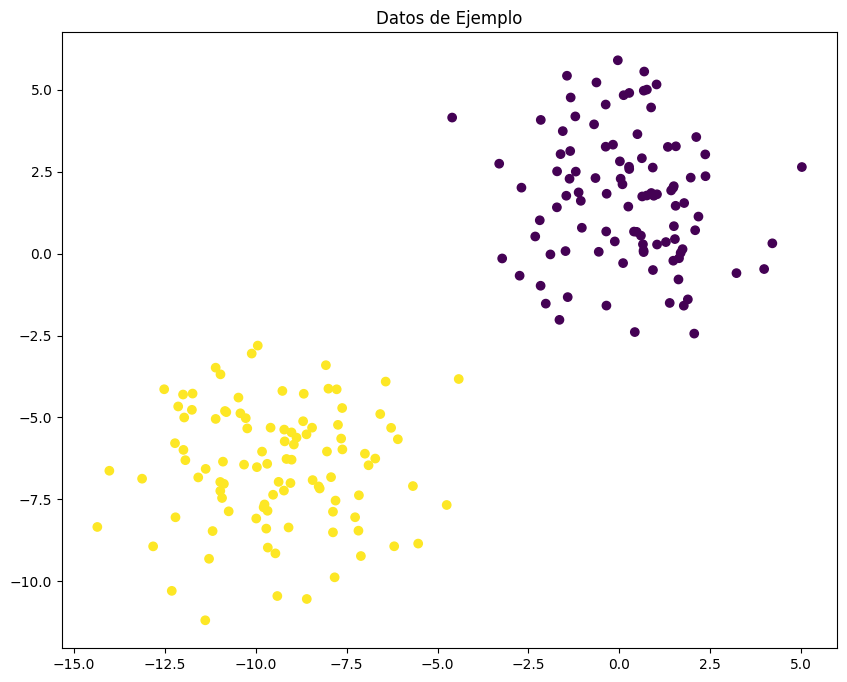

In [22]:
plt.figure(figsize=(10, 8))
plt.scatter(X[:,0], X[:,1], c=y)
plt.title('Datos de Ejemplo')

### Realizando la Clusterización Jerárquica

In [23]:
from sklearn.cluster import AgglomerativeClustering

In [24]:
hc = AgglomerativeClustering(metric='euclidean', linkage='ward')

In [25]:
y_hc = hc.fit_predict(X)

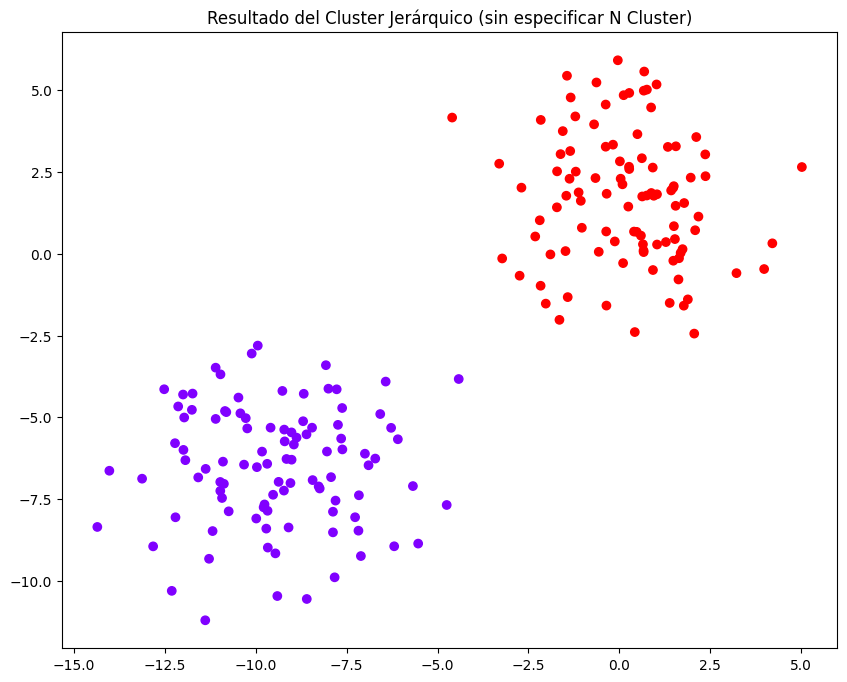

In [26]:
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=y_hc, cmap='rainbow')
plt.title('Resultado del Cluster Jerárquico (sin especificar N Cluster)')
plt.show()

### Graficando un Dendrograma

In [27]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X, method='ward')

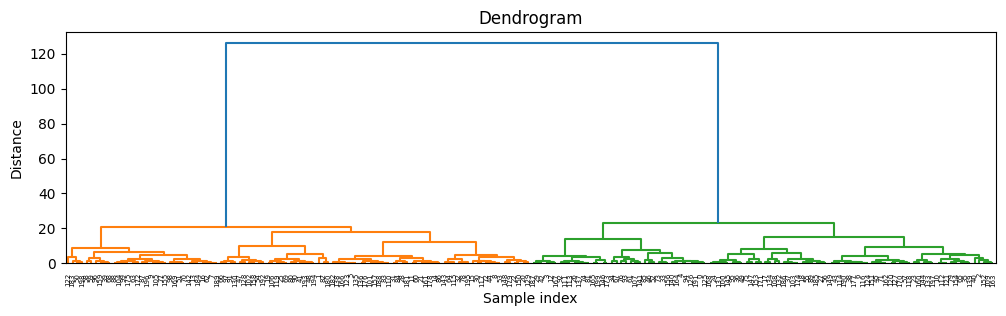

In [28]:
# Plot del dendrograma
plt.figure(figsize=(12, 3))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

### Personalizaciones al Dendrograma

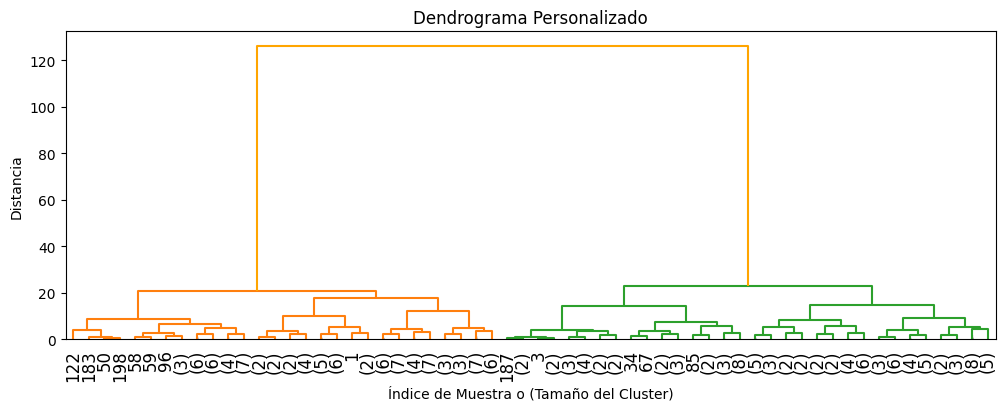

In [29]:
# Customizar el dendrograma
plt.figure(figsize=(12, 4))
dendrogram(
    Z,
    #truncate_mode='lastp',  # Mostrar solo los últimos p clusters combinados
    #truncate_mode= None,  # Muestra todo el dendrograma sin truncar
    truncate_mode='level',  # Mostrar solo los nodos hasta un nivel específico
    p=5,  # Limitar el dendrograma a 5 niveles
    leaf_rotation=90.,  # Rotar las etiquetas del eje x
    leaf_font_size=12.,  # Tamaño de fuente para las etiquetas del eje x
    show_contracted=True,  # Para obtener una impresión de distribución en ramas truncadas
    above_threshold_color='orange'  # Color para las ramas por encima del umbral
)
plt.title('Dendrograma Personalizado')
plt.xlabel('Índice de Muestra o (Tamaño del Cluster)')
plt.ylabel('Distancia')
plt.show()

### Seleccionando la cantidad de clusters

c:\Users\adria\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\adria\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\adria\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\adria\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Wi

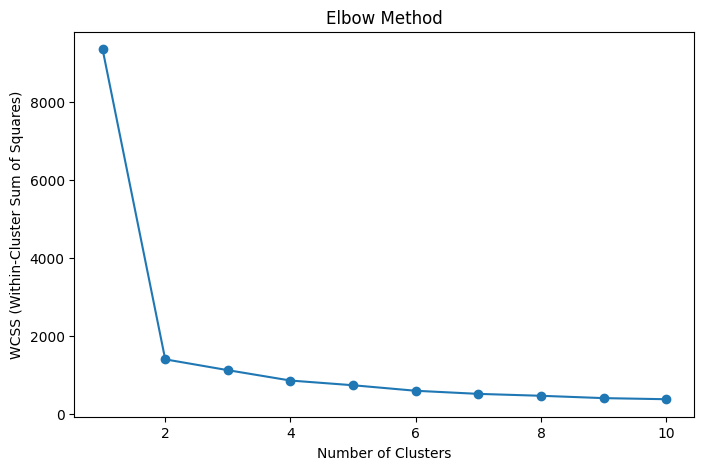

In [30]:
from sklearn.cluster import KMeans

# Usando en método del codo para encontrar el número óptimo de clusters
wcss = []

# Prueba distintos números de clusters
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=101)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Graficando el resultado
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

c:\Users\adria\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\adria\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\adria\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\adria\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Wi

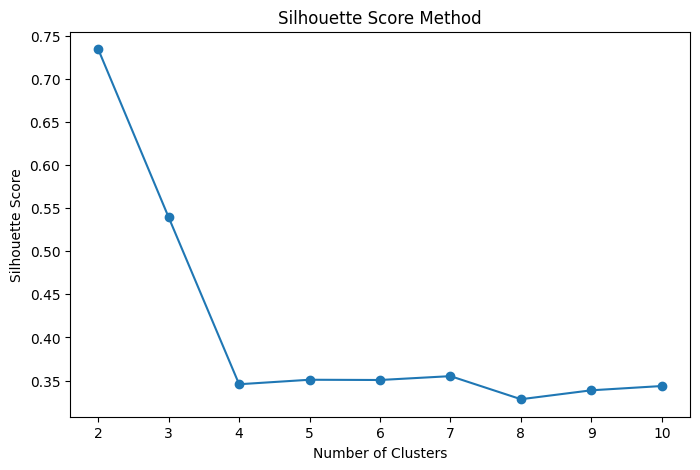

In [31]:
from sklearn.metrics import silhouette_score

# Calcular el scores de la silueta para diferentes números de clusters
silhouette_scores = []

for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=101)
    labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores.append(silhouette_avg)

# Graficando el resultado
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

### Obteniendo el cluster

In [32]:
# Probemos con un cluster = 2

hc = AgglomerativeClustering(n_clusters = 2, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

### Visualizando el Cluster

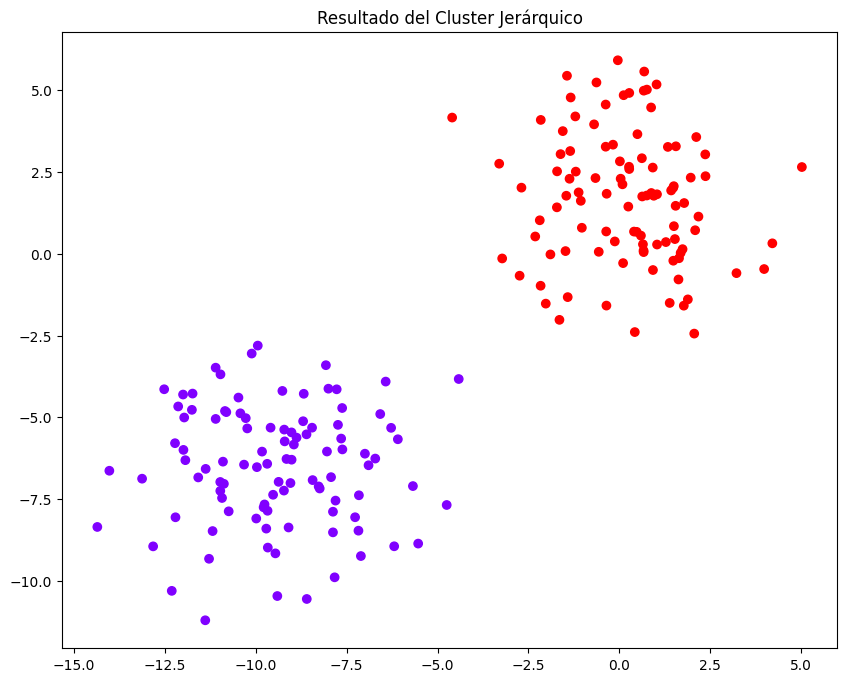

In [33]:
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=y_hc, cmap='rainbow')
plt.title('Resultado del Cluster Jerárquico')
plt.show()

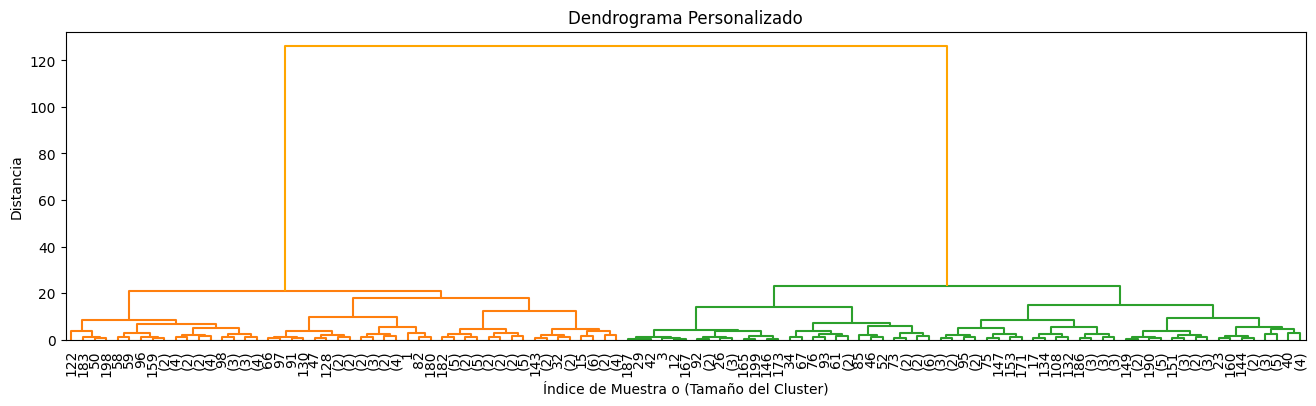

In [34]:
plt.figure(figsize=(16, 4))
dendrogram(
    Z,
    #truncate_mode='lastp',  # Mostrar solo los últimos p clusters combinados
    #truncate_mode= None,  # Muestra todo el dendrograma sin truncar
    truncate_mode='level',  # Mostrar solo los nodos hasta un nivel específico
    p=6,  # Limitar el dendrograma a 5 niveles
    leaf_rotation=90.,  # Rotar las etiquetas del eje x
    leaf_font_size=10.,  # Tamaño de fuente para las etiquetas del eje x
    show_contracted=True,  # Para obtener una impresión de distribución en ramas truncadas
    above_threshold_color='orange'  # Color para las ramas por encima del umbral
)
plt.title('Dendrograma Personalizado')
plt.xlabel('Índice de Muestra o (Tamaño del Cluster)')
plt.ylabel('Distancia')
plt.show()

### Conclusiones, análisis e insights

- **Número de clusters**: A partir del dendrograma, el método del codo (WCSS) y el coeficiente de silueta, la mejor elección es **k = 2**. Es donde el WCSS presenta el “codo” más claro y donde la silueta alcanza su valor máximo.
- **Separación de grupos**: Los dos clusters encontrados están bien separados en el plano de características generado con `make_blobs`, lo que se aprecia en la visualización final del clustering jerárquico.
- **Consistencia entre métodos**: Tanto los métodos basados en K-Means (codo y silueta) como el dendrograma jerárquico apuntan a la misma estructura de 2 grupos, lo que refuerza la confianza en esta partición.
- **Interpretación general**: En un caso real, cada cluster podría representar segmentos de clientes/usos/perfiles distintos (por ejemplo, clientes de bajo vs alto valor, patrones de comportamiento, etc.). El clustering jerárquico permite además entender **cómo** se van fusionando los grupos a distintas distancias (vista de “árbol” del problema).
- **Próximos pasos posibles**: Se podría repetir el análisis con más características, comparar con otros algoritmos de clustering (K-Means, DBSCAN) y caracterizar cuantitativamente cada cluster (media, desviación estándar de las variables) para traducir los resultados en acciones de negocio concretas.

### Buenas prácticas en clustering basado en distancias

- **Escalamiento de variables**: cuando el algoritmo usa distancias (Euclídea, Manhattan, etc.), escale las variables (por ejemplo con `StandardScaler` o `MinMaxScaler`) para que ninguna dimensión domine solo por su unidad o rango.
- **Revisión de outliers**: detecte y analice outliers antes de clusterizar (boxplots, z-scores, métodos de detección de anomalías). Pocos puntos extremos pueden distorsionar seriamente las distancias y, por tanto, la formación de clusters.
- **Validación de estabilidad**: valide la elección de `k` con varios métodos (codo, silueta, inspección visual del dendrograma) y, cuando haya aleatoriedad (como en K-Means), repita el experimento con distintas semillas para comprobar que el número y la forma de los clusters son estables.
- **Interpretabilidad**: una vez definidos los clusters, calcule estadísticas descriptivas por grupo (medias, desviaciones, proporciones) para poder traducir los resultados en conclusiones o acciones de negocio concretas.